# 건강검진 데이터로 가설검증하기
**01. 라이브러리 로드하고 한글폰트 설정하기**

- 학습목표
    - 데이터 분석을 위한 라이브러리 로드방법 익히기
    - 한글 폰트를 설정하는 방법 알아보기

- 핵심키워드
    - pandas
    - numpy
    - seaborn
    - matplotlib

## 1. 음주 여부에 따라 건강검진 수치 차이가 있을까?

## 2. 신장과 허리둘레의 크기는 체중과 상관관계가 있을까?
- 분석을 통해 가설을 검정해 봅시다.

## 3. 라이브러리 로드

In [1]:
# pandas: 분석 사용
# numpy: 수치계산
# seaborn: 시각화
# 구버전의 jupyter notebook 에서는 %matplotlib inline 설정되있어야 노트북안에서 그래프를 시각화합니다.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## 4. 한글폰트 설정

In [2]:
# Google Colab 사용 시 아래 주석을 풀고 폰트설정을 합니다.
# 로컬아나콘다 사용 시에는 그대로 주석처리 해놓으시면 됩니다.
# 나눔고딕 설치
# 이 코드를 사용시 아래에 있는 폰트를 로드할 경우 colab에서는 오류가 발생하니
# 아래에 있는 폰트 설정은 꼭 주석처리를 해주세요.
# !apt -qq -y install fonts-nanum > /dev/null

# import matplotlib.font_manager as fm
# fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
# font = fm.FontProperties(fname = fontpath, size = 9)
# fm._rebuild()

# Colab 의 한글 폰트 설정
# plt.rc('font', family = 'NanumGothic')
import os
os.name

if os.name == 'nt':
    plt.rc('font', family='Malgun Gothic')
else:
    plt.rc('font', family='AppleGothic')
    
# 마이너스 폰트 깨지는 문제에 대한 대처
plt.rc('axes', unicode_minus = False)

# 레티나 설정을 해주면 글씨가 좀 더 선명하게 보입니다.
# 폰트의 주변이 흐릿하게 보이는 것을 방지합니다.
%config InlineBackend.figure_format = 'retina'

## 5. 데이터 불러오기
- 건강검진정보란 2002년부터 2013년까지의 국민건강보험의 직장가입자와 40세 이상의 피부양자, 세대주민 지역가입자와 40세 이상 가입자의 일반겅강검진 결과와 이들 일반건강검진 대상자 중에 만 40세와 만 66세에 도달한 이들이 받게 되는 생애전환기검강검진 수가 있는 각 연도별 수진자 100만 명에 대한 기본정보(성, 연령대, 시도코드 등)와 검진내역(신장, 체중, 총콜레스테롤, 혈색소 등)으로 구성된 개방데이터이다.

공공데이터 개방서비스(http://nhiss.nhis.or.kr/op/it/index.do) 에서도 다운받을 수 있음
- 건강검진정보(2017) 다운로드 받기 : https://www.data.go.kr/dataset/15007122/fileData.do
- 2018년 데이터로 실습을 하셔도 됩니다. 다만 encoding과 컬럼명이 달라서 2018년 데이터에 맞게 고쳐주시면 됩니다.
- 2018년 외 다른 연도의 데이터로도 실습을 하고자 한다면 컬럼명과 인코딩에 주의해 주세요.

In [3]:
# 다운로드 받은 파일을 판다스의 read_csv 를 통해 읽어옵니다.
# 파일을 읽어온 후 shape 로 행과 열의 수를 출력합니다.
df = pd.read_csv('dataset.csv', encoding = 'cp949')
df.shape

(757906, 34)

#### 5-1 데이터 미리보기

In [4]:
# pandas 모든 컬럼명 출력하기
pd.set_option('display.max_columns', 100)

In [5]:
df.head(3)

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,2017,1,1,8,43,170,75,90.0,1.0,1.0,1.0,1.0,120.0,80.0,99.0,193.0,92.0,48.0,126.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,1.0,1,NaN,NaN,NaN,NaN,1.0,20181126
1,2017,2,1,7,11,180,80,89.0,0.9,1.2,1.0,1.0,130.0,82.0,106.0,228.0,121.0,55.0,148.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,0.0,1,NaN,NaN,NaN,NaN,2.0,20181126
2,2017,3,1,9,41,165,75,91.0,1.2,1.5,1.0,1.0,120.0,70.0,98.0,136.0,104.0,41.0,74.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126


In [6]:
df.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상', '치석',
       '데이터공개일자'],
      dtype='object')

In [7]:
df.head?

In [8]:
df.sample()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
346942,2017,346943,2,13,48,155,60,83.5,1.2,0.9,1.0,1.0,120.0,80.0,96.0,216.0,238.0,43.0,125.0,14.2,1.0,0.5,34.0,35.0,26.0,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126


## 6. 기본정보 보기

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 757906 entries, 0 to 757905
Data columns (total 34 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   기준년도          757906 non-null  int64  
 1   가입자일련번호       757906 non-null  int64  
 2   성별코드          757906 non-null  int64  
 3   연령대코드(5세단위)   757906 non-null  int64  
 4   시도코드          757906 non-null  int64  
 5   신장(5Cm단위)     757906 non-null  int64  
 6   체중(5Kg단위)     757906 non-null  int64  
 7   허리둘레          757714 non-null  float64
 8   시력(좌)         757758 non-null  float64
 9   시력(우)         757760 non-null  float64
 10  청력(좌)         757782 non-null  float64
 11  청력(우)         757782 non-null  float64
 12  수축기혈압         757893 non-null  float64
 13  이완기혈압         757893 non-null  float64
 14  식전혈당(공복혈당)    757873 non-null  float64
 15  총콜레스테롤        757873 non-null  float64
 16  트리글리세라이드      757871 non-null  float64
 17  HDL콜레스테롤      757872 non-null  float64
 18  LDL콜

In [10]:
# 컬럼의 수가 많습니다. 컬럼만 따로 출력합니다.
df.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상', '치석',
       '데이터공개일자'],
      dtype='object')

In [11]:
# dtypes 를 통해 데이터 형식만 출력합니다.
df.dtypes

기준년도              int64
가입자일련번호           int64
성별코드              int64
연령대코드(5세단위)       int64
시도코드              int64
신장(5Cm단위)         int64
체중(5Kg단위)         int64
허리둘레            float64
시력(좌)           float64
시력(우)           float64
청력(좌)           float64
청력(우)           float64
수축기혈압           float64
이완기혈압           float64
식전혈당(공복혈당)      float64
총콜레스테롤          float64
트리글리세라이드        float64
HDL콜레스테롤        float64
LDL콜레스테롤        float64
혈색소             float64
요단백             float64
혈청크레아티닌         float64
(혈청지오티)AST      float64
(혈청지오티)ALT      float64
감마지티피           float64
흡연상태            float64
음주여부            float64
구강검진수검여부          int64
치아우식증유무         float64
결손치유무           float64
치아마모증유무         float64
제3대구치(사랑니)이상    float64
치석              float64
데이터공개일자           int64
dtype: object

## 7. 결측치 보기
- 학습목표
    - 데이터셋을 요약하고, 집계하는 방법
- 핵심 키워드
    - df.isnull().sum() / df.isna().sum()
    - df.isnull().sum().plot_barh()
    - df.describe()
    - df.value_counts()

In [12]:
# isnull 을 통해 결측치를 bool 값으로 표시하고 sum을 하면 컬럼마다 결측치 수를 세어줍니다.
# python
# True = 1
# False = 0
df.isnull().sum()

기준년도                 0
가입자일련번호              0
성별코드                 0
연령대코드(5세단위)          0
시도코드                 0
신장(5Cm단위)            0
체중(5Kg단위)            0
허리둘레               192
시력(좌)              148
시력(우)              146
청력(좌)              124
청력(우)              124
수축기혈압               13
이완기혈압               13
식전혈당(공복혈당)          33
총콜레스테롤              33
트리글리세라이드            35
HDL콜레스테롤            34
LDL콜레스테롤          2263
혈색소                 42
요단백               3511
혈청크레아티닌             34
(혈청지오티)AST          32
(혈청지오티)ALT          33
감마지티피               32
흡연상태                98
음주여부               390
구강검진수검여부             0
치아우식증유무         757906
결손치유무           757906
치아마모증유무         757906
제3대구치(사랑니)이상    757906
치석              454158
데이터공개일자              0
dtype: int64

In [13]:
# isna 로도 결측치 여부를 확인하고 sum을 통해 결측치 수를 집계
df.isna().sum()

기준년도                 0
가입자일련번호              0
성별코드                 0
연령대코드(5세단위)          0
시도코드                 0
신장(5Cm단위)            0
체중(5Kg단위)            0
허리둘레               192
시력(좌)              148
시력(우)              146
청력(좌)              124
청력(우)              124
수축기혈압               13
이완기혈압               13
식전혈당(공복혈당)          33
총콜레스테롤              33
트리글리세라이드            35
HDL콜레스테롤            34
LDL콜레스테롤          2263
혈색소                 42
요단백               3511
혈청크레아티닌             34
(혈청지오티)AST          32
(혈청지오티)ALT          33
감마지티피               32
흡연상태                98
음주여부               390
구강검진수검여부             0
치아우식증유무         757906
결손치유무           757906
치아마모증유무         757906
제3대구치(사랑니)이상    757906
치석              454158
데이터공개일자              0
dtype: int64

<AxesSubplot:>

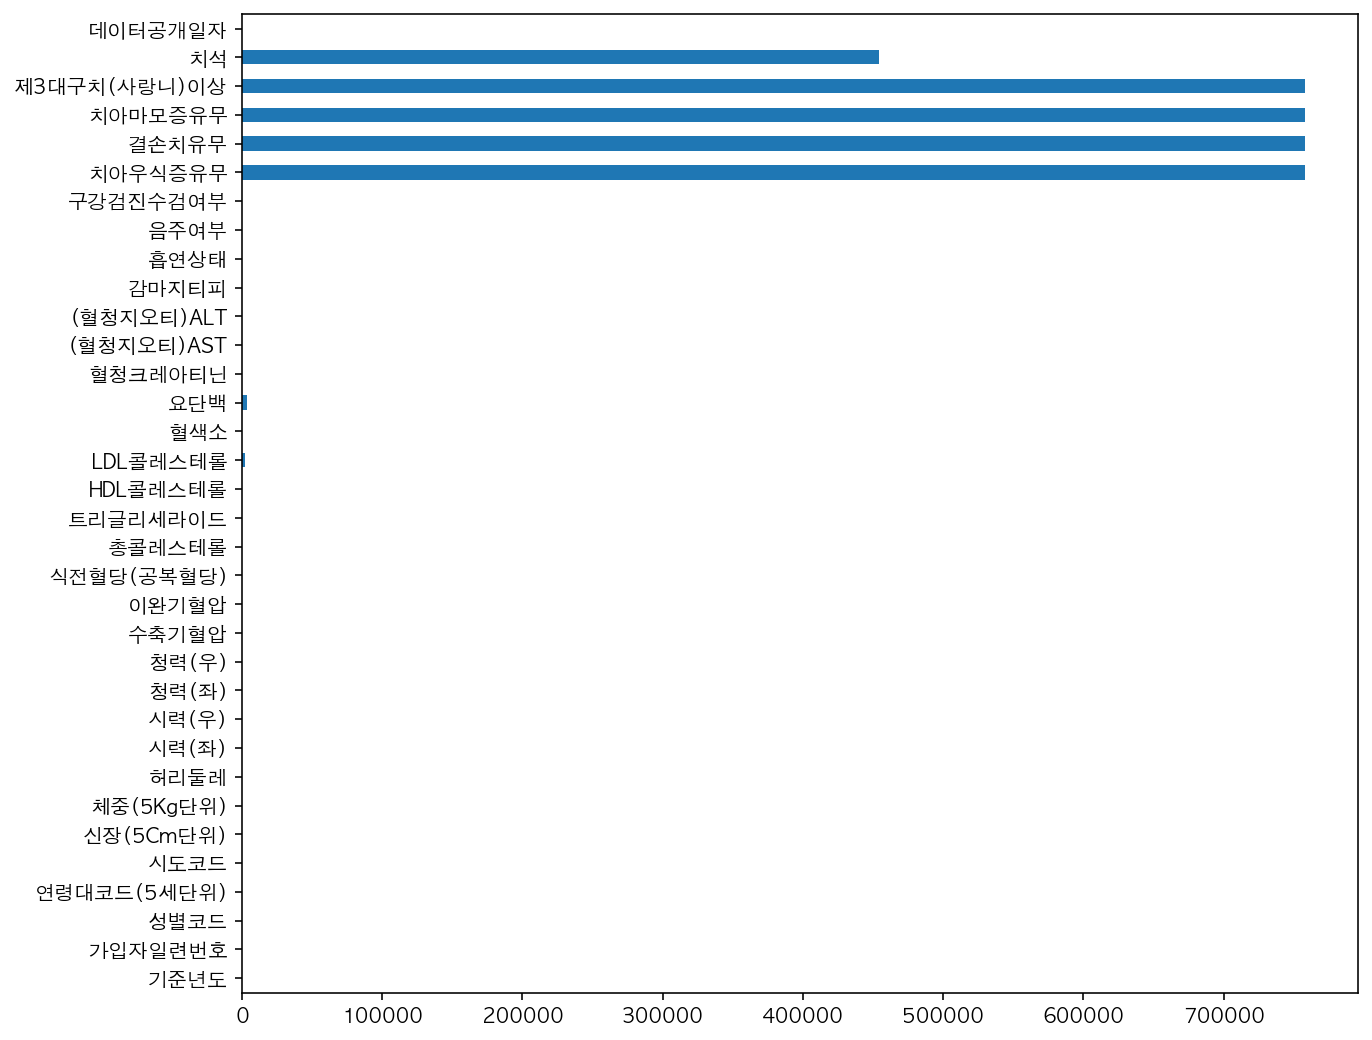

In [14]:
# 판다스에 내장 된 plot을 통해 시각화를 합시다.
df.isnull().sum().plot.barh(figsize = (10, 9))

## 8. 일부 데이터 요약하기

In [15]:
df.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상', '치석',
       '데이터공개일자'],
      dtype='object')

In [16]:
# 여러 컬럼을 가져옵니다.
# "(혈청지오티)ALT", "(혈청지오티)AST" 를 가져와 미리보기 합니다.
# df[['혈청지오티(ALT)', '(혈청지오티)AST']].head(3)
df[['(혈청지오티)ALT', '(혈청지오티)AST']].head(3)

,(혈청지오티)ALT,(혈청지오티)AST
0,35.0,21.0
1,36.0,20.0
2,32.0,47.0


In [17]:
# 가져온 데이터를 요약해봅니다.
# df[['(혈청지오티)ALT', '(혈청지오티)AST']].info()
df[['(혈청지오티)ALT', '(혈청지오티)AST']].describe() # 이상치가 검출된다. (평균은 20대인데 맥스값이 9999가 있음)

,(혈청지오티)ALT,(혈청지오티)AST
count,757873.000000,757874.000000
mean,25.755832,25.997845
std,25.750986,23.625187
min,1.000000,1.000000
25%,15.000000,19.000000
50%,20.000000,23.000000
75%,29.000000,28.000000
max,7210.000000,9999.000000


## 9. value_counts 로 값 집계하기

In [18]:
# value_counts 를 통해 성별코드로 그룹화하고 갯수를 집계합니다.
df['성별코드'].value_counts()

1    401915
2    355991
Name: 성별코드, dtype: int64

In [19]:
# value_counts 를 통해 흡연상태로 그룹화 하고 갯수를 집계합니다.
df['흡연상태'].value_counts()

1.0    460735
3.0    163318
2.0    133755
Name: 흡연상태, dtype: int64

## 10. groupby 와 pivot_table 사용하기
- 학습목표
    - groupby 와 pivot_table 사용방법 이해
    - groupby 와 pivot_table 차이점 이해
        - groupby
            - 속도가 더 빠름.
            - Series 로 반환한다. ( 아닌경우도 있음 )
        - pivot_table
            - DataFrame 으로 반환한다.
            - 사용법이 직관적이다.
            - 속도가 더 느리다.
        
- 핵심 키워드
    - df.groupby()
    - df.pivot_table()

### 10-1 groupby

In [20]:
# groupby 를 통해 데이터를 그룹화 합니다.
# 성별코드로 그룹화 한 데이터를 세어 봅니다.
df.groupby(['성별코드'])['가입자일련번호'].count()

성별코드
1    401915
2    355991
Name: 가입자일련번호, dtype: int64

In [21]:
# 성별코드와 음주여부로 그룹화를 하고 갯수를 세어봅니다.
df.groupby(['성별코드', '음주여부'])['가입자일련번호'].count()

성별코드  음주여부
1     0.0     131714
      1.0     270047
2     0.0     247830
      1.0     107925
Name: 가입자일련번호, dtype: int64

In [22]:
# 성별코드와 음주여부로 그룹화하고, 감마지피티의 평균을 구합니다.
df.groupby(['성별코드', '음주여부'])['감마지티피'].mean() # 음주하고 있는 사람들이 수치가 더 높게 나온다.(평균값을 통해 확인)

성별코드  음주여부
1     0.0     34.724290
      1.0     56.586561
2     0.0     22.665860
      1.0     24.979420
Name: 감마지티피, dtype: float64

In [23]:
# 성별코드와 음주여부로 그룹화하고, 감마지티피의 요약수치를 구합니다.
df.groupby(['성별코드', '음주여부'])['감마지티피'].describe() # max값이 이상치같음

count       mean        std  min   25%   50%   75%    max
성별코드 음주여부                                                              
1    0.0   131707.0  34.724290  37.339108  1.0  18.0  25.0  38.0  999.0
     1.0   270040.0  56.586561  68.782960  1.0  24.0  37.0  63.0  999.0
2    0.0   247818.0  22.665860  25.584743  1.0  13.0  17.0  24.0  999.0
     1.0   107919.0  24.979420  36.559157  1.0  13.0  17.0  25.0  999.0

In [24]:
# agg을 사용하면 여러 수치를 함께 구할 수 있습니다.
'''
맥스값 때문에 평균이 높게 나와서 편향이 되어있다고 할 수 있음.
'''
df.groupby(['성별코드', '음주여부'])['감마지티피'].agg(['count', 'mean', 'median'])

count       mean  median
성별코드 음주여부                           
1    0.0   131707  34.724290    25.0
     1.0   270040  56.586561    37.0
2    0.0   247818  22.665860    17.0
     1.0   107919  24.979420    17.0

### 10-2 pivot_table
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html

In [25]:
# 음주여부에 따른 그룹화된 수를 피봇테이블로 구합니다.
df.pivot_table(
    index = '음주여부',
    values = ['가입자일련번호'],
    aggfunc = 'count'
)

,가입자일련번호
음주여부,
0.0,379544
1.0,377972


In [26]:
# 음주여부에 따른 감마지티피의 평균을 구합니다.
pd.pivot_table(
    df,
    index = '음주여부',
    values = ['감마지티피'],
)

,감마지티피
음주여부,
0.0,26.850511
1.0,47.561743


In [27]:
# 기본값은 평균을 구하지만 aggfunc 을 통해 지정해 줄 수도 있습니다.
pd.pivot_table(
    df,
    index = '음주여부',
    values = ['감마지티피', '성별코드'],
    aggfunc = ['mean', 'median']
)

mean           median     
          감마지티피      성별코드  감마지티피 성별코드
음주여부                                 
0.0   26.850511  1.652968   19.0    2
1.0   47.561743  1.285537   29.0    1

In [28]:
# aggfunc에 describe를 사용해 통계요약값을 한번에 볼 수도 있습니다.
pd.pivot_table(
    df,
    index = ['성별코드', '음주여부'],
    values = '감마지티피',
    aggfunc = 'describe'
)

25%   50%   75%     count    max       mean  min        std
성별코드 음주여부                                                              
1    0.0   18.0  25.0  38.0  131707.0  999.0  34.724290  1.0  37.339108
     1.0   24.0  37.0  63.0  270040.0  999.0  56.586561  1.0  68.782960
2    0.0   13.0  17.0  24.0  247818.0  999.0  22.665860  1.0  25.584743
     1.0   13.0  17.0  25.0  107919.0  999.0  24.979420  1.0  36.559157

## 11. 전체 데이터 시각화 하기
100만개가 넘는 데이터를 시각화할 때는 되도록이면 groupby 혹은 pivot_table로 연산을 하고 시각화를 하는 것을 권장합니다.<br>
100만개가 넘는 데이터를 seaborn과 같은 고급 통계 연산을 하는 그래프를 사용하게 되면 많이 느릴 수 있습니다.

- 학습목표
    - pandas를 활용하여 히스토그램을 그려봅니다.
    - 슬라이싱을 통해 그래프를 그리는 법을 알아봅니다.
- 핵심 키워드
    - 히스토그램 => df.hist()
    - 슬라이싱 => df.iloc[ ]

### 11-1 히스토그램
- 판다스의 info  기능을 통해 대부분 수치 데이터로 이루어 진것을 확인할 수 있었습니다.
- 히스토그램을 사용하면 수치데이터를 bin의 갯수만큼 그룹화 해서 도수분포표를 만들고 그 결과를 시각화 합니다.
- 이 데이터에는 수치데이터가 많기 때문에 판다스의 hist를 사용해서 히스토그램을 그립니다.

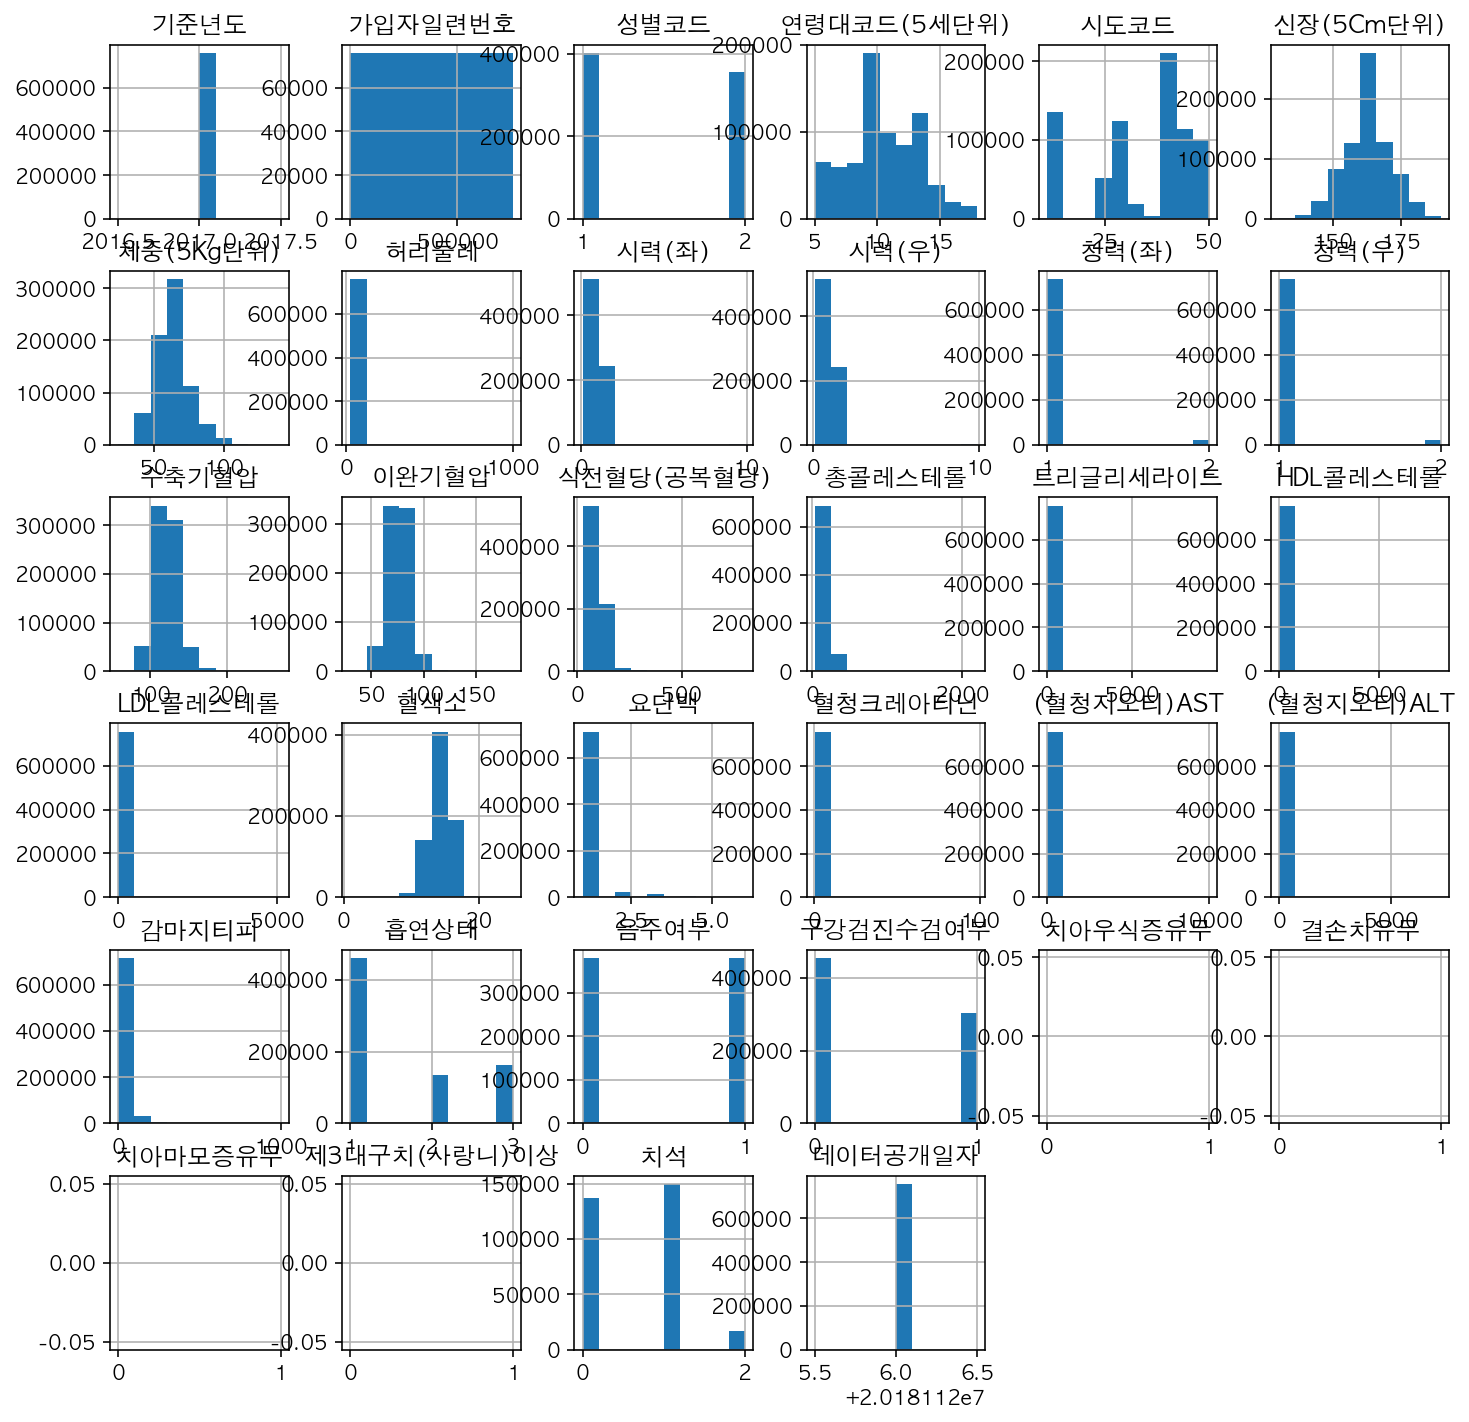

In [48]:
# 전체 데이터에 대한 히스토그램을 출력합니다.
h = df.hist(figsize = (12, 12))

### 11-2 슬라이싱을 사용해 히스토그램 그리기
- 슬라이싱 기능을 사용해서 데이터를 나누어 그립니다.
- 슬라이싱 사용시 iloc를 활용하면 인덱스의 순서대로 슬라이싱이 가능합니다.
- iloc[행, 열] 순으로 인덱스를 써주면 해당 인덱스만 불러오며, 전체 데이터를 사져오고자 할 때는 [:, :] 을 사용합니다.
- 슬라이싱을 해주는 대괄호 안의 콜론 앞뒤에 숫자를 써주게 되면 해당 시작인덱스 : 끝나는인덱스(+1) 를 지정할 수 있습니다.

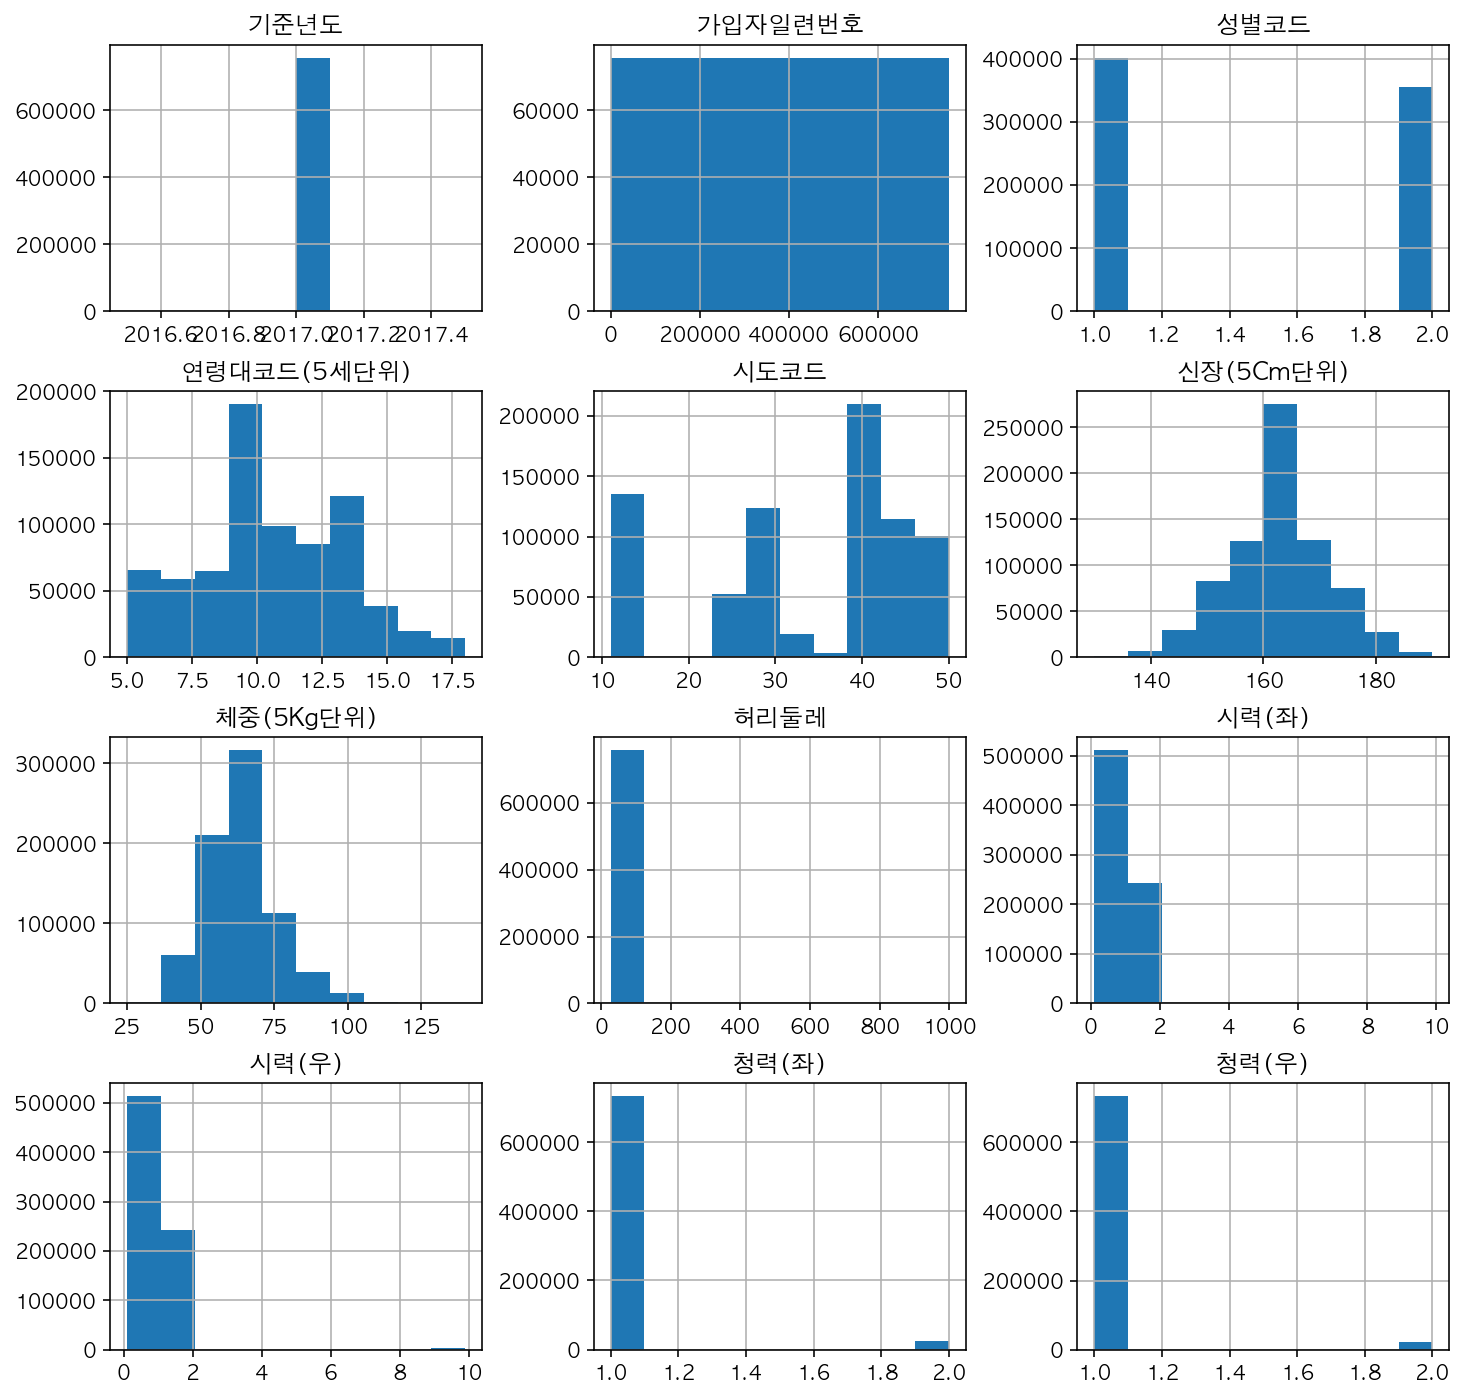

In [49]:
# 슬라이싱을 사용해 앞에서 12개의 컬럼에 대한 데이터로 히스토그램을 그립니다.
# [행, 열]
h = df.iloc[:, :12].hist(figsize = (12, 12))

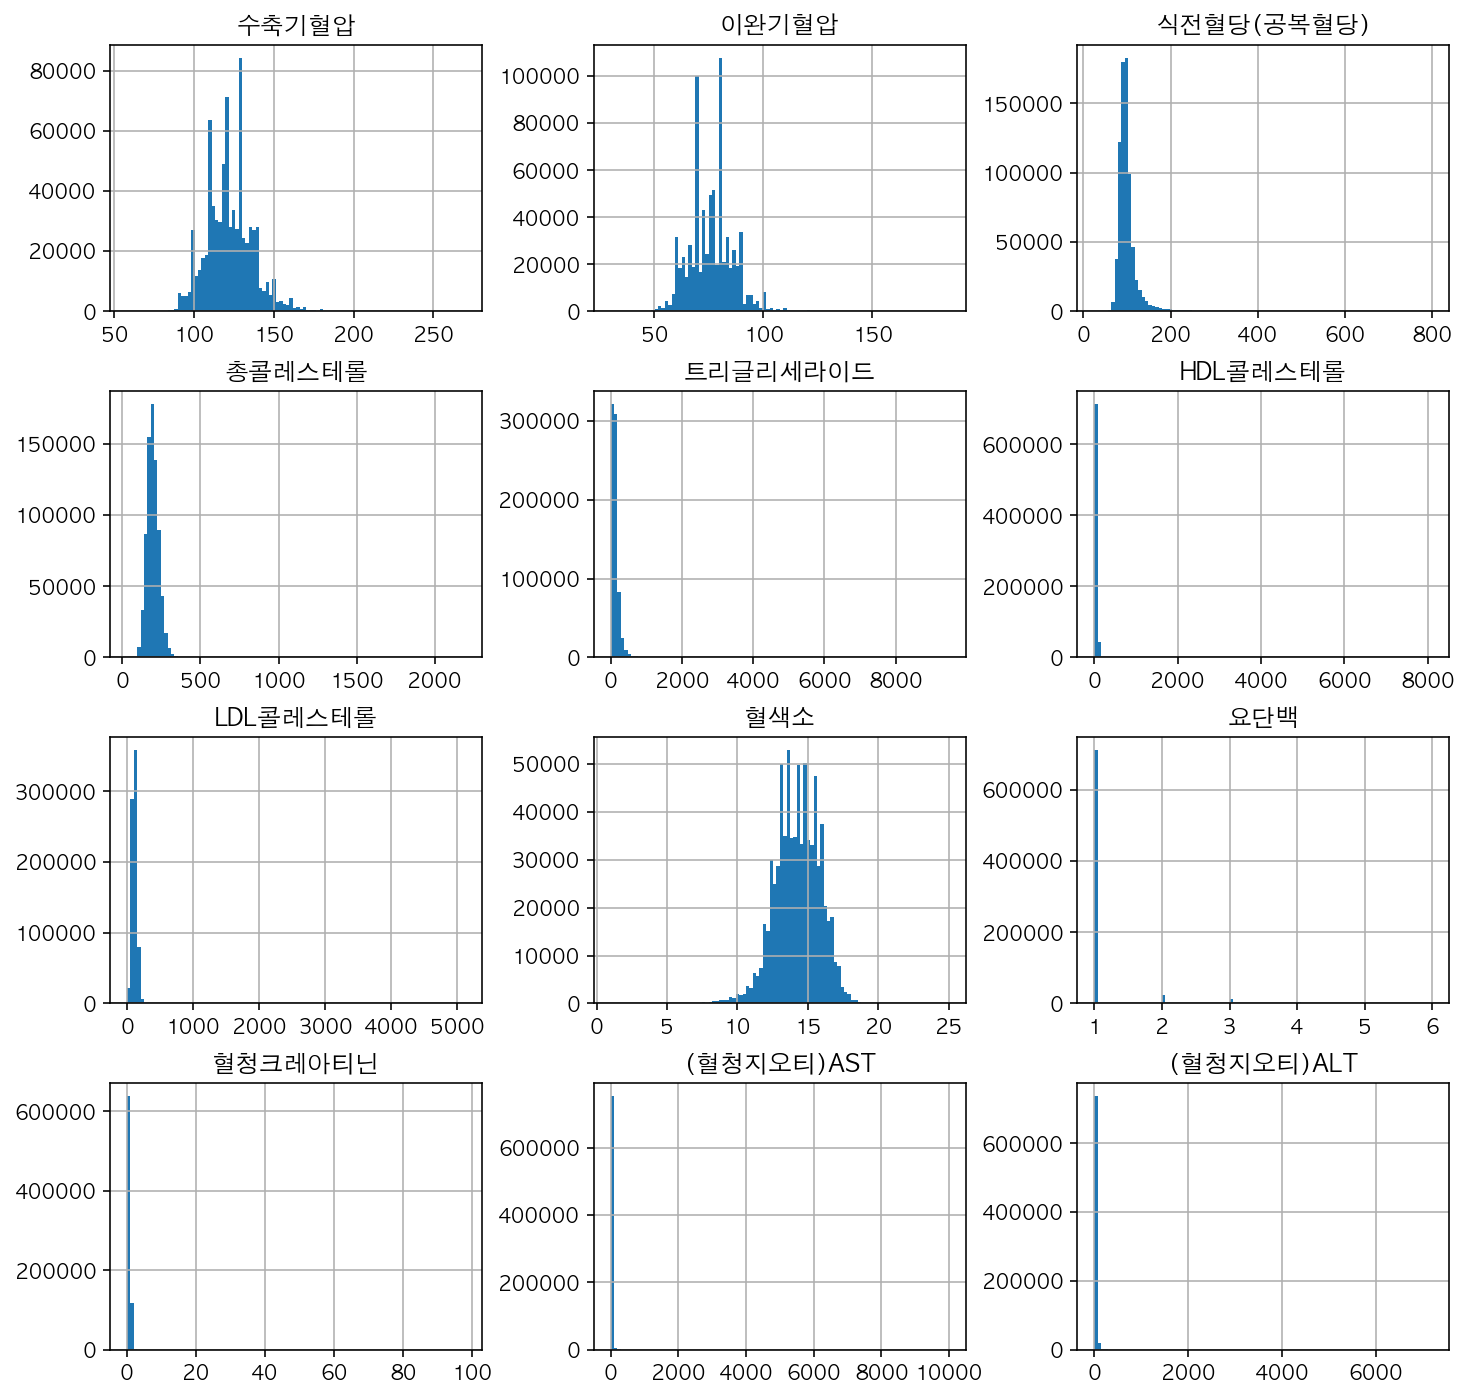

In [53]:
# 슬라이싱을 사용해 앞에서 12번째부터 23번째까지 (12 : 24) 컬럼에 대한 데이터로 히스토그램을 그립니다.
h = df.iloc[: , 12:24].hist(figsize = (12, 12), bins = 100)

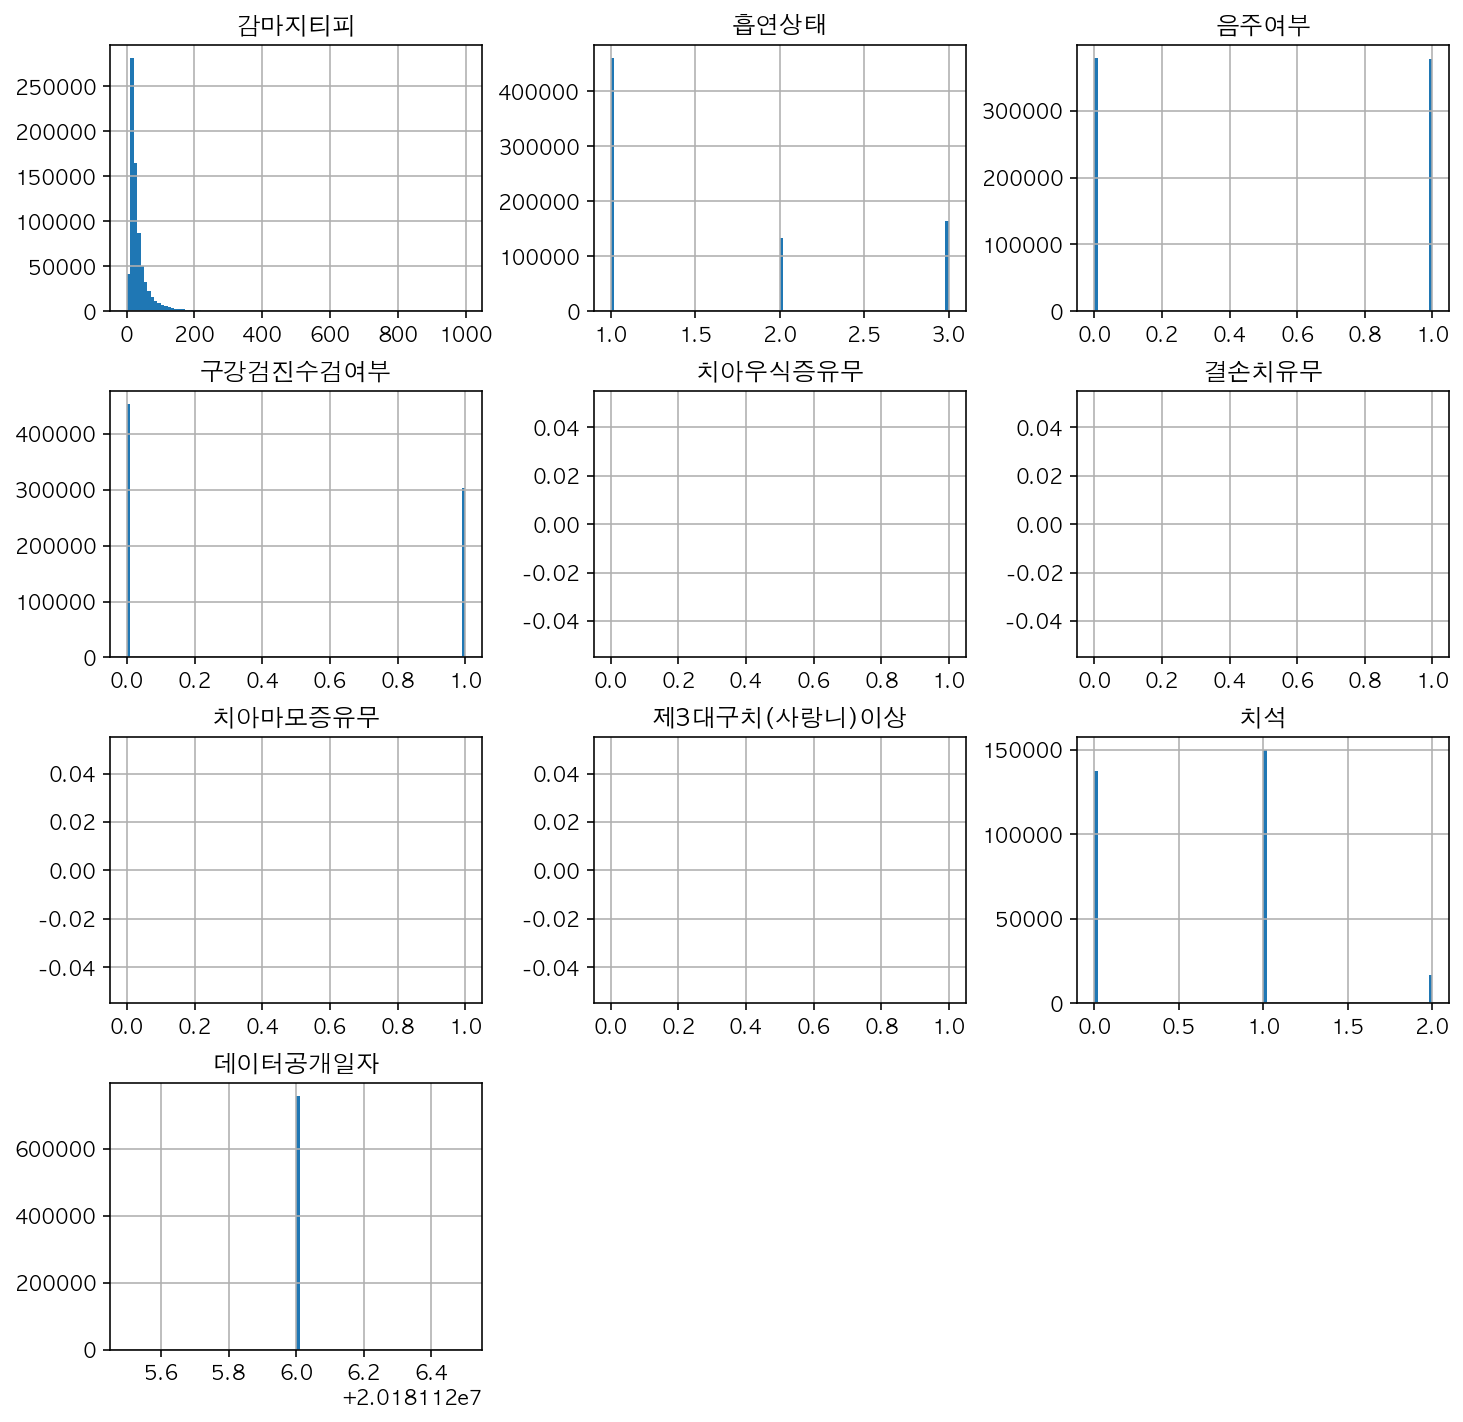

In [54]:
# 슬라이싱을 사용해 앞에서 24번째부터 마지막까지 (24: ) 칼럼에 대한 데이터로 히스토그램을 그립니다.
h = df.iloc[:, 24:].hist(figsize = (12, 12), bins = 100)

## 12. 샘플데이터 추출하기
- seaborn의 그래프는 내부에서 수학적 연산이 되기 때문에 데이터가 많으면 속도가 오래 걸립니다.
- 따라서 전체 데이터를 사용하면 너무 느리기 때문에 일부만 샘플링해서 사용합니다.

데이터의 빈도수 시각화 하기(막대그래프1) - countplot
- 학습목표
    - seaborn 을 사용하는 방법을 알아봅니다.
    - countplot 을 그리고, feature에 따른 분포를 확인합니다.
- 핵심키워드
    - seaborn
    - countplot
    - x, y, data, hue

In [65]:
# df.sample을 통해 일부 데이터만을 샘플데이터로 추출합니다.
# random_state 를 사용해 샘플링되는 값을 고정할 수 있습니다.
# 실험을 통제하기 위해 random_state 를 고정하기도 합니다.
# 여기에서는 1을 사용하겠습니다. 이 값은 높든 낮든 상관 없이 값을 고정시키는 역할만 합니다.

df_sample = df.sample(1000, random_state = 1) # random_state 를 1을주면 항상 같은 값을 가져오게 된다.
df_sample.shape

(1000, 34)

## 13. 데이터 시각화 도구 Seaborn 사용하기
- https://seaborn.pydata.org/
- seaborn 은 https://matplotlib.org/ 을 사용하기 쉽게 만들어졌으며, 간단하게 고급 통계 연산을 할 수 있습니다.
    

## 14. 범주형(카테고리) 데이터 시각화
- countplot은 범주형 데이터의 수를 더한 값을 그래프로 표현합니다.
- value_counts 로 구한 값을 시각화한다고 보면 됩니다.

### 14-1. countplot - 음주여부

<AxesSubplot:>

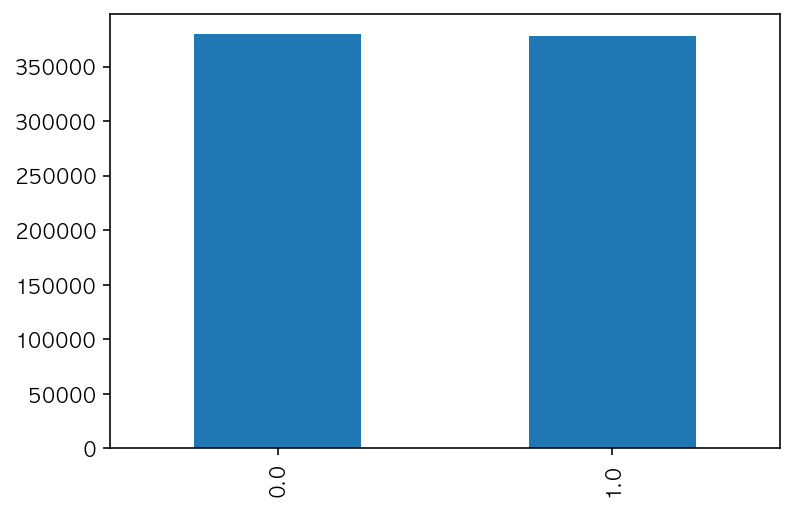

In [71]:
# 음주여부에 따른 countplot을 그립니다.
df['음주여부'].value_counts().plot.bar()

<AxesSubplot:xlabel='음주여부', ylabel='count'>

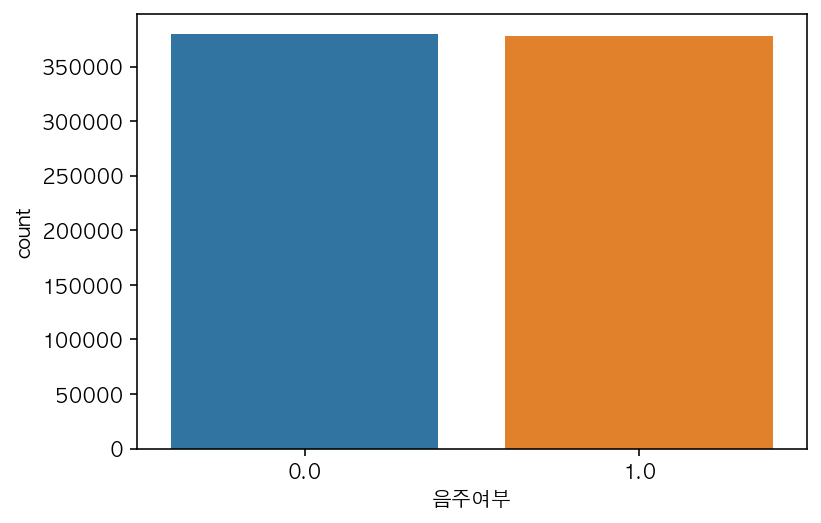

In [74]:
sns.countplot(
    x = '음주여부',
    data = df
)

### 14-2. hue 옵션 사용하기

<AxesSubplot:xlabel='음주여부', ylabel='count'>

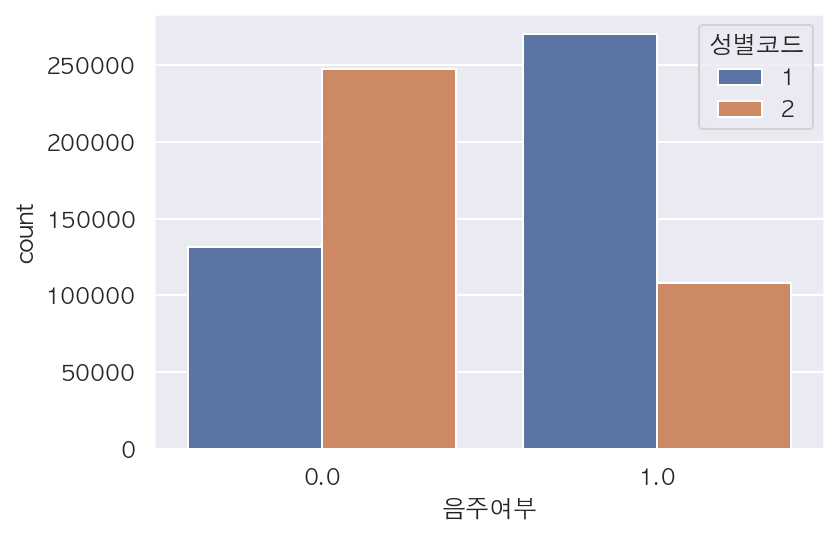

In [92]:
# 음주여부에 따른 countplot을 그리고 hue 을 사용해 성별코드로 색상을 구분해 그립니다.
# 여기에서 hue는 포토샵에 있는 hue 메뉴를 떠올리면 됩니다. 색상을 의미합니다.
# 또 seaborn 에서 제공하는 폰트 설정을 사용하실 수도 있습니다.
# 다만, 이 때 seaborn 의 기본 스타일이 적용되는 것을 확인해 주시는 것이 좋습니다.

# Mac
# sns.set(font_scale=1, font='AppleGothic')
# Window
# sns.set(font_scale=1.5, font='Malgun Gothic')

sns.countplot(
    data = df,
    x = '음주여부',
    hue = '성별코드'
)

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='count'>

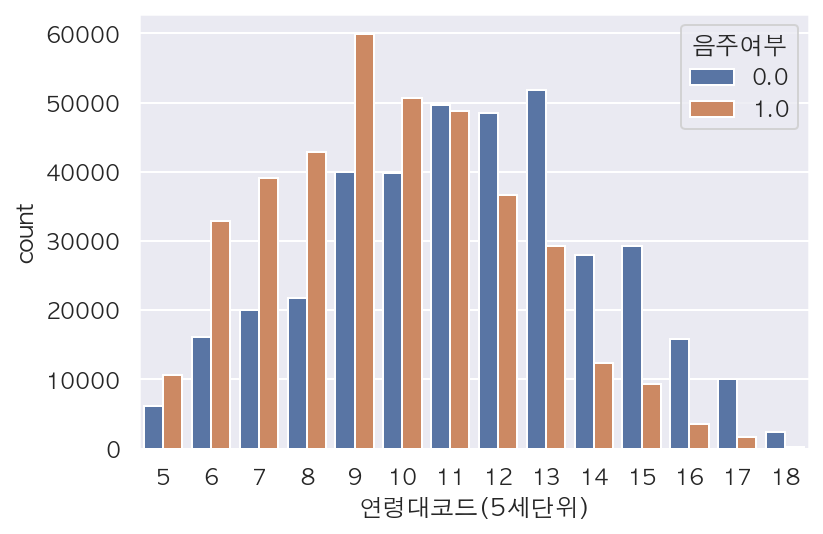

In [93]:
# countplot으로 연령대별 음주여부를 봅니다.
# hue를 사용해 다른 색상으로 표현합니다.
sns.countplot(
    data = df,
    x = '연령대코드(5세단위)',
    hue = '음주여부',
)

### 14-3. countplot - 키와 몸무게
- 키와 몸무게는 연속형 데이터라고 볼 수 있습니다.
- 하지만 이 데이터는 키는 5cm, 체중은 5kg 단위로 되어 있습니다.
- 이렇게 특정 범위로 묶게 되면 연속형 데이터라기 보다는 범주형 데이터라고 볼 수 있습니다.

<AxesSubplot:xlabel='신장(5Cm단위)', ylabel='count'>

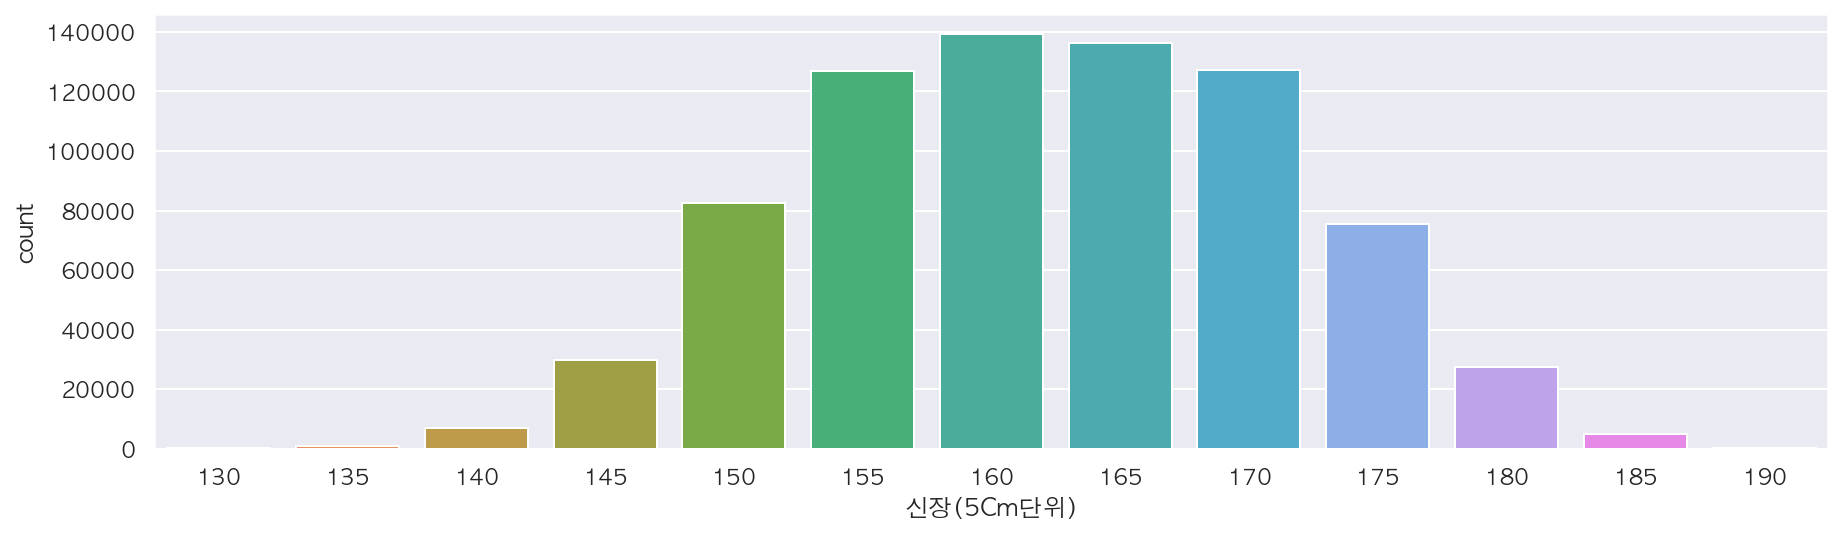

In [121]:
# countplot 으로 키를 봅니다.
plt.figure(figsize=(15, 4))
sns.countplot(
    data = df,
    x = '신장(5Cm단위)'
)

<AxesSubplot:xlabel='체중(5Kg단위)', ylabel='count'>

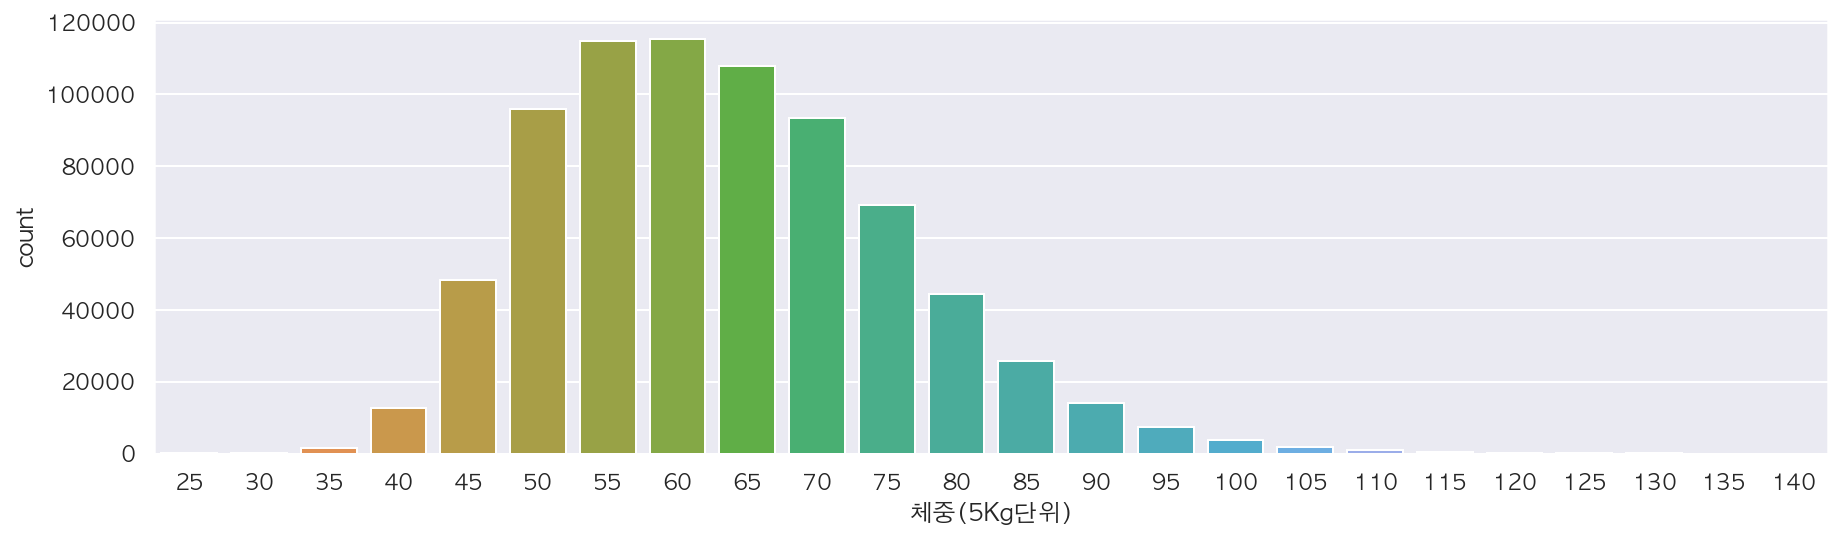

In [122]:
# countplot 으로 체중을 봅니다.
plt.figure(figsize=(15, 4))
sns.countplot(
    data = df,
    x = '체중(5Kg단위)',
)

<AxesSubplot:xlabel='신장(5Cm단위)', ylabel='count'>

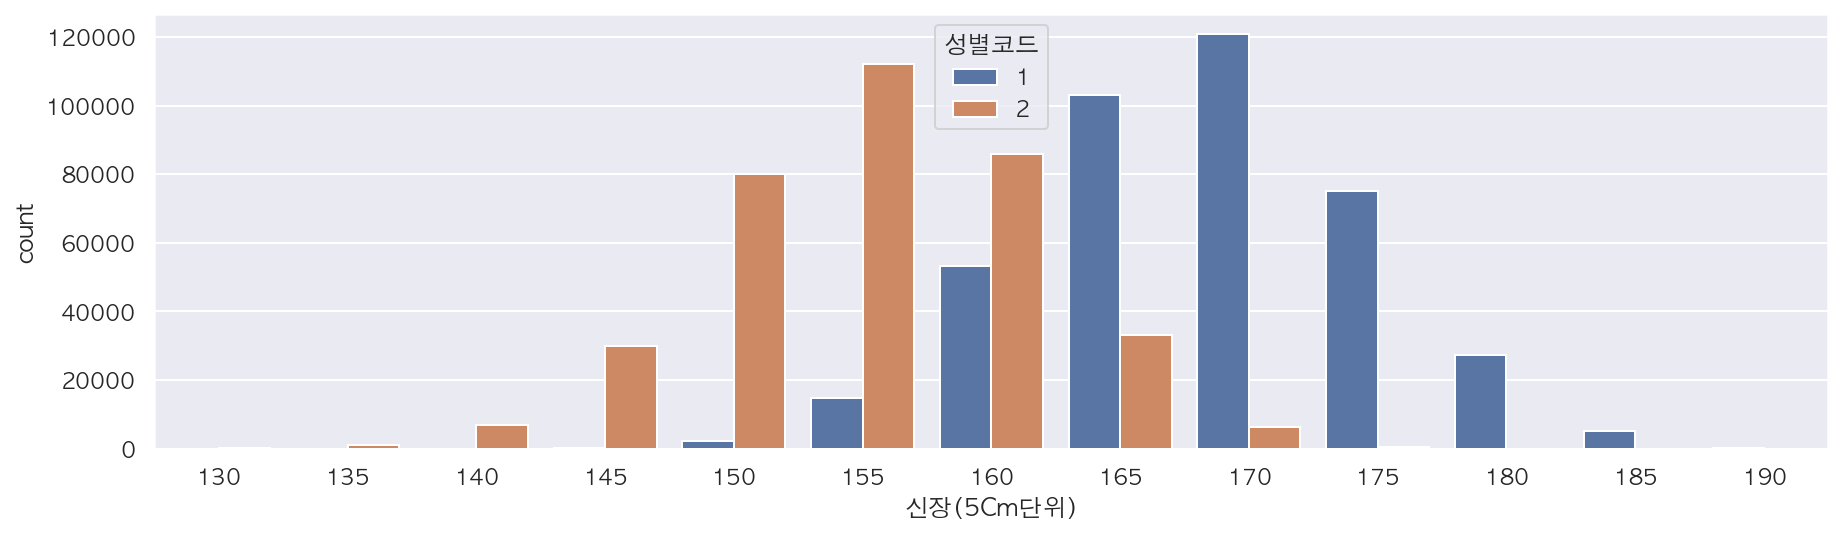

In [123]:
# countplot 으로 신장(5cm단위)를 봅니다.
# 성별에 따른 키의 차이를 봅니다.
plt.figure(figsize=(15, 4))
sns.countplot(
    data = df,
    x = '신장(5Cm단위)',
    hue = '성별코드'
)

<AxesSubplot:xlabel='체중(5Kg단위)', ylabel='count'>

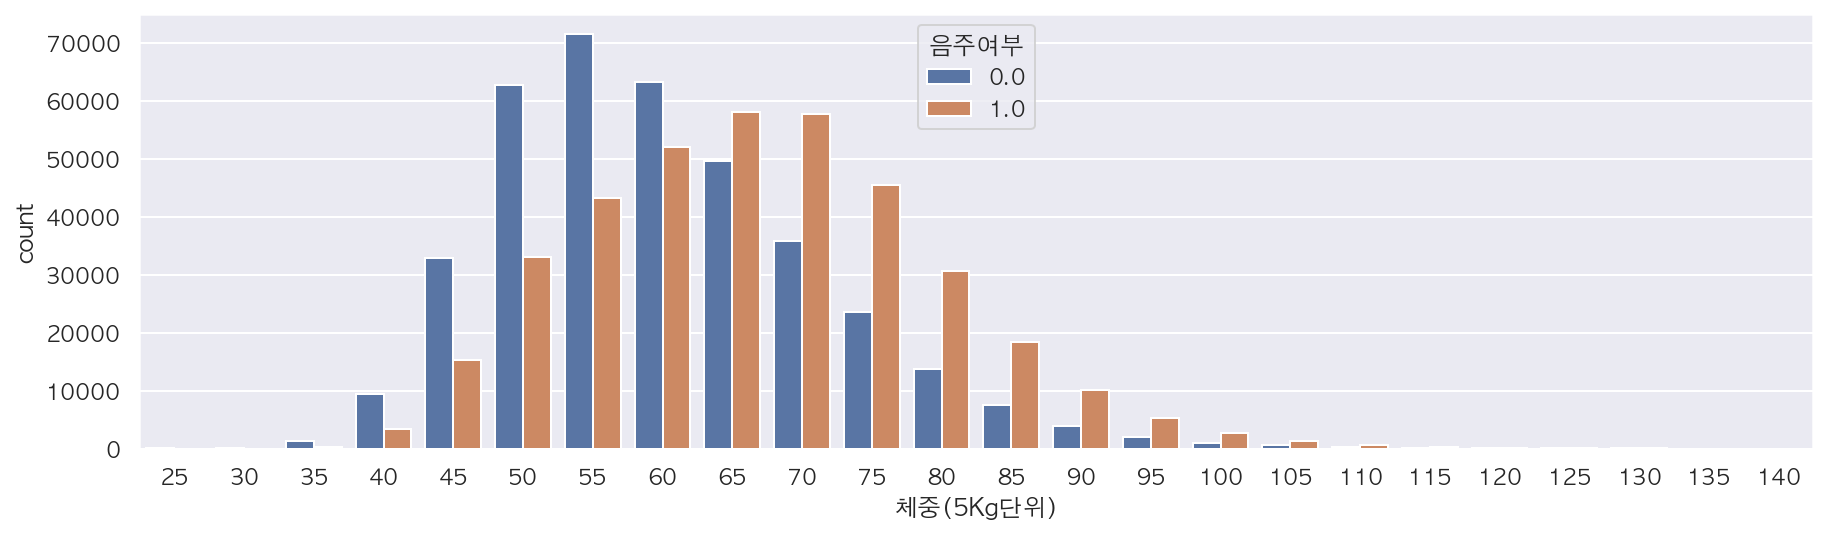

In [124]:
# 성별에 따른 체중의 차이를 봅니다.
# 음주에 따른 체중의 차이를 봅니다.

plt.figure(figsize=(15, 4))
sns.countplot(
    data = df,
    x = '체중(5Kg단위)',
    hue = '음주여부' # 성별코드
)

### 14-4. barplot - 수치형 vs 범주형 데이터 시각화

In [107]:
# 연령대코드와 총 콜레스테롤을 봅니다.
# hue 로 색상을 다르게 표현할 수 있습니다. 음주여부를 함께 봅니다.


In [108]:
# 연령대코드와 총 콜레스테롤을 봅니다.
# 콜레스테롤과 연령대코드(5세단위)를 흡연상태에 따라 barplot으로 그립니다.


In [109]:
# 트리글리세라이드(중성지방) 에 따른 연령대콛(5세단위)를 음주여부에 따라 barplot으로 그립니다.


In [110]:
# 음주여부와 체중(5Kg단위)을 성별에 따라 봅니다.


In [111]:
# 연령대코드(5세단위) 에 따른 체중(5Kg단위) 을 음주여부에 따라 barplot 으로 그립니다.


### 14-5. lineplot and pointplot

In [112]:
# 연령대코드(5세단위) 에 따른 체중(5Kg단위) 을 성별코드에 따라 lineplot으로 그립니다.


In [114]:
# 연령대코드(5세단위) 에 따른 신장(5Cm단위) 을 성별코드에 따라 lineplot으로 그립니다.
